<a href="https://colab.research.google.com/github/castudil/Machine-Learning/blob/main/S08-Decision-Trees/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier #tipo de clasificador
from sklearn.tree import plot_tree #visualizar arbol de decision

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Cargar datos

In [95]:
df= pd.read_csv('https://raw.githubusercontent.com/sotastica/data/main/uso_internet_espana.csv')
df.sample(10)

,Unnamed: 0,uso_internet,sexo,edad,estudios
2270,2291,1,Mujer,30,Medios universitarios
45,47,1,Hombre,64,Medios universitarios
766,774,1,Hombre,28,F.P.
1712,1728,1,Hombre,30,F.P.
1440,1454,1,Hombre,22,F.P.
2377,2398,0,Mujer,82,Primaria
391,394,0,Mujer,50,Primaria
1219,1229,0,Mujer,72,Sin estudios
363,366,1,Hombre,33,F.P.
1086,1095,0,Mujer,54,Medios universitarios


1. Convertir variales de "string" a "numeric"

In [97]:
df = pd.get_dummies(data=df, drop_first=True)

### Seleccionar variables

In [99]:
X= df.drop(columns='uso_internet')
y= df.uso_internet

### Entrenar al modelo

In [118]:
model = DecisionTreeClassifier(max_depth=4)

In [119]:
model.fit(X,y)

DecisionTreeClassifier(max_depth=4)

### Visualizar el modelo

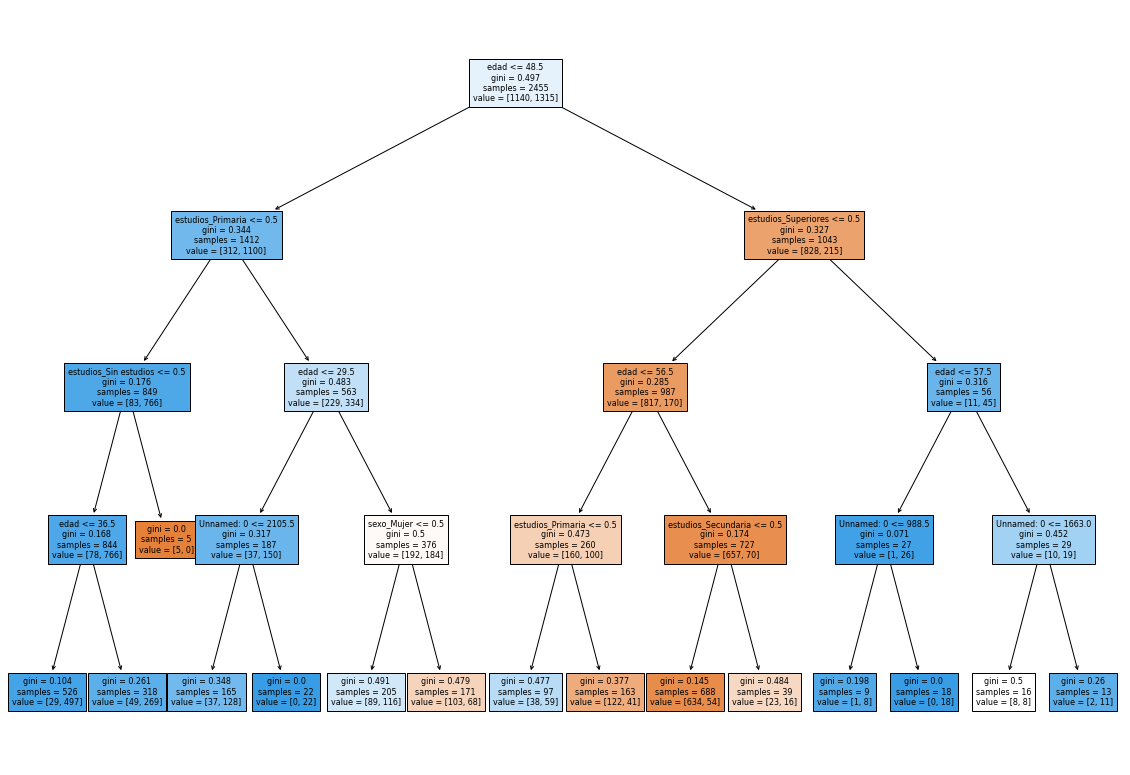

In [128]:
plt.figure(figsize=(20,14))
plot_tree(decision_tree=model, feature_names=X.columns, filled=True, fontsize=8);

### Calcular predicción


In [108]:
a = X.sample()

In [109]:
a

,Unnamed: 0,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
2335,2356,28,0,0,0,0,0,0


In [110]:
y_pred = model.predict(X)

### Interpretar el modelo

In [111]:
df['pred'] = y_pred

In [112]:
df.sample(10)[['uso_internet','pred']]

,uso_internet,pred
1670,1,1
162,0,0
2228,0,0
178,1,1
1408,1,0
1722,0,0
2216,1,1
1148,0,0
2312,0,0
2333,0,0


In [113]:
from sklearn.metrics import confusion_matrix

In [125]:
confusion_matrix(y, y_pred)

array([[1014,  126],
       [ 354,  961]])

In [124]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.8044806517311609